# 🫀 CAIRE Hackathon Starter Notebook  
### Task: Cardiac Event Detection from PPG Signals

Welcome to the **Cardiac Event Detection** challenge 🎯

This notebook corresponds to **Option 1** of the **Add-On ML Innovations** in the Hackathon Challenge.  

Your goal is to build a **Machine Learning model** that detects **arrhythmia events** from physiological signals — distinguishing between healthy and irregular cardiac rhythms.


## 📋 OVERVIEW

This notebook helps you build a machine learning model for cardiac arrhythmia detection. You'll train a classifier to distinguish between healthy and arrhythmic heart rhythms using our curated PPG dataset.

**What happens next?**  
This notebook focuses **only on the PPG training stage** — building and exporting your arrhythmia-detection model using clean, sensor-based PPG signals.  

In the next stages of the hackathon, you’ll **use this exported model** on top of **rPPG signals extracted from driver videos via the CAIRE Cloud API**, and **integrate it into your real-time dashboard** to test how well it generalizes to real-world conditions.  


## 🎯 YOUR MISSION

### Step 1: Train on PPG Data (This Notebook)
- Work with medical-grade PPG (Photoplethysmography) signals from contact sensors
- Build and train a binary classifier: Healthy vs. Arrhythmic rhythms
- Evaluate model performance on our test set
- Export your trained model for deployment

### Step 2: Deploy on rPPG Signals (Next Challenge)
- Use the CAIRE Cloud API to extract rPPG signals from driver videos
- Apply your PPG-trained model to these camera-based physiological signals
- Evaluate real-world performance and generalization

---

**Key Deliverable**: A trained model that accepts a 10-second signal segment and outputs an arrhythmia prediction.

## 🔬 UNDERSTANDING THE SIGNAL TYPES

<p align="center">
  <img src="https://drive.google.com/uc?id=1lxRC-nDFiYRfm75f8-_ce1_HTzzwqYRm" width="400">
  <br>
  <em>Figure: Comparing PPG (contact) vs rPPG (remote) signal acquisition</em>  
  <br>
  <sub>Source: Fan et al., <em>Robust blood pressure estimation using an RGB camera</em>, Journal of Ambient Intelligence and Humanized Computing, 2020.  
  DOI: <a href="https://doi.org/10.1007/s12652-018-1026-6" target="_blank">10.1007/s12652-018-1026-6</a></sub>
</p>

### PPG (Photoplethysmography) - What You're Training On
- **Source**: Contact-based sensors (e.g., fingertip pulse oximeter, wearable devices)
- **Quality**: High signal-to-noise ratio, medical-grade accuracy
- **Stability**: Minimal motion artifacts, controlled measurement conditions
- **Use Case**: Perfect for learning cardiac rhythm patterns

### rPPG (Remote Photoplethysmography) - Your Deployment Target
- **Source**: Camera-based extraction from facial video (measures subtle skin color changes)
- **Context**: Real-time driver monitoring in vehicles
- **Challenges**: Lower signal quality, environmental variations, movement during driving
- **Use Case**: Non-contact health monitoring for automotive safety

---

**Why This Matters**: PPG datasets exist for arrhythmia detection, but rPPG arrhythmia datasets don't.  
Your challenge is to bridge this gap by training on PPG and deploying on rPPG signals retrieved from our API.


## 🩺 WHAT IS AN ARRHYTHMIA?

An **arrhythmia** is any **abnormal heart rhythm** that deviates from normal cardiac function.

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1YbjXcZqcwDOsGXr-UO2alOkchKRBtoCq" alt="Normal vs Irregular Heart Rhythms" width="500">
</p>

<p align="center"><b>Figure 2.</b> Comparison of normal and irregular heart rhythms (ECG waveforms).<br>
<em>Source: Mount Elizabeth Hospitals, “Did Your Heart Skip a Beat? All about Arrhythmia” (2021)</em></p>

### Normal Rhythm (Sinus Rhythm)
- Regular, periodic heartbeats with consistent intervals  
- Predictable peak-to-peak timing

### Arrhythmic Rhythm
Irregular patterns including:
- **Premature beats** (occurring too early)  
- **Skipped beats** (missing expected pulses)  
- **Chaotic timing** (unpredictable intervals)

---

### 🔗 How It Relates to PPG and rPPG
Both **PPG** (contact) and **rPPG** (remote, camera-based) signals capture the same underlying **pulse waveform** generated by the heart’s rhythm.  
Arrhythmias appear as **irregular waveform patterns** in both — but rPPG is often noisier, making detection more challenging.

---

**Why It Matters for Driving**: Severe arrhythmias (like ventricular tachycardia or cardiac arrest patterns) can cause dizziness, fainting, or impaired motor control — making real-time detection critical for road safety.  

💡 **Bonus Challenge :**  
Some **motion artifacts or lighting changes** in rPPG can **mimic arrhythmia-like patterns** even when the heart rhythm is normal.  
Think about how you’d **detect or correct** these cases.

## 1️⃣ Importations + Dataset Setup  

This cell imports all required libraries, downloads, and extracts the PPG Arrhythmia dataset.  
After running it, a **`data`** folder will appear in your working directory 🚀


In [1]:
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import gdown
import zipfile
import shutil

# --- Configuration ---
FILE_ID = "16jlBsawf1rOefEaxpSbd_dPspnrZS2nB"
ZIP_PATH = "/content/ppg_arrhythmia.zip"
DATA_PATH = "/content/data"
# ---------------------

# 1. Clean up (from previous runs)
if os.path.exists(DATA_PATH):
    print(f"🧹 Removing existing '{DATA_PATH}' folder...")
    shutil.rmtree(DATA_PATH)

# 2. Download
gdown.download(f"https://drive.google.com/uc?id={FILE_ID}", ZIP_PATH, quiet=False)

# 3. Extract
print(f"\n📂 Extracting dataset...")
try:
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall("/content/") # Extract to the parent directory
except zipfile.BadZipFile:
    print(f"❌ Error: Failed to open zip file. Download may have been corrupted.")
    # Stop execution if zip is bad
    raise

# 4. Clean up Zip
print("\n🧹 Deleting zip file...")
os.remove(ZIP_PATH)

# 5. Verify
if os.path.exists(DATA_PATH):
    print(f"\n✅ Success! Dataset is ready in the '{DATA_PATH}' folder.")

    print(f"\n📁 Contents of '{DATA_PATH}' :")
    try:
        # List only the first 5 items
        contents = os.listdir(DATA_PATH)
        print(f"  {contents[:5]} {'...' if len(contents) > 5 else ''}")
    except Exception as e:
        print(f"  Could not list contents: {e}")
else:
    print(f"❌ Error: Final directory '{DATA_PATH}' not found after extraction.")
    print("   Please check the zip file's internal structure.")

ModuleNotFoundError: No module named 'numpy'

In [ ]:
import numpy as np
import pandas as pd
import os

# Set the base data directory

data_dir = 'data'

# Load training data
X_train = np.load(os.path.join(data_dir, 'train', 'train_segments.npy'))
y_train = np.load(os.path.join(data_dir, 'train', 'train_labels.npy'))
train_metadata = pd.read_csv(os.path.join(data_dir, 'train', 'train_metadata.csv'))

# Load test data
X_test = np.load(os.path.join(data_dir, 'test', 'test_segments.npy'))
y_test = np.load(os.path.join(data_dir, 'test', 'test_labels.npy'))
test_metadata = pd.read_csv(os.path.join(data_dir, 'test', 'test_metadata.csv'))

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Training data shape: (35120, 1000)
Training labels shape: (35120,)
Test data shape: (11707, 1000)
Test labels shape: (11707,)

Class distribution in training set:
1    0.688126
0    0.311874
Name: proportion, dtype: float64

Class distribution in test set:
1    0.688135
0    0.311865
Name: proportion, dtype: float64


## 2️⃣ Dataset Overview & Exploration

📦 **Dataset Attribution & Credits**  
This dataset was **curated and reorganized** from the following public study:

> **Liu, Z., Zhou, B., Jiang, Z., Chen, X., Li, Y., Tang, M., & Miao, F.**  
> *Multiclass Arrhythmia Detection and Classification From Photoplethysmography Signals Using a Deep Convolutional Neural Network.*  
> **Journal of the American Heart Association**, 2022; **11**(7): e023555.  
> doi:[10.1161/JAHA.121.023555](https://doi.org/10.1161/JAHA.121.023555)  

### 📋 What You're Working With

You've been provided with **photoplethysmography (PPG) signals** — these are physiological time-series recordings that capture blood volume changes. Your mission: build a model that can distinguish between healthy and arrhythmic heart rhythms!

---

### 📊 DATASET SPECIFICATIONS

|                    | Training | Test   | Total  |
|--------------------|----------|--------|--------|
| **Samples**        | 35,120   | 11,707 | 46,827 |
| **Duration**       | 97.6 hrs | 32.5 hrs | 130.1 hrs |
| **Segment Length** | 10 seconds @ 100 Hz (1,000 samples) |
| **Class Distribution** | Healthy: 31.2% / Arrhythmic: 68.8% |

---

### 🗂️ Dataset Structure
```
data/
├── train/
│   ├── train_segments.npy    # Training PPG signals
│   └── train_labels.npy       # Ground truth labels
└── test/
    ├── test_segments.npy      # Test PPG signals
    └── test_labels.npy        # Test labels
```

### 🏷️ Labels
- **0** = Healthy rhythm (normal cardiac activity)
- **1** = Arrhythmic rhythm (irregular cardiac activity)

---

### Signal Characteristics
- **Sampling rate**: 100 Hz
- **Segment duration**: 10 seconds per sample
- **Data format**: NumPy arrays (.npy)
- **Samples per segment**: 1,000 values

Each sample is a **~10-second PPG segment** stored as a 1-D array. This is a **binary classification** problem — predict the label for each test segment!

---

## 🔍 Let's Inspect the Data

In [5]:
DATA_PATH = "data/"

# ==================== LOAD DATASET ====================
train_segments = np.load(os.path.join(DATA_PATH, 'train', 'train_segments.npy'))
train_labels   = np.load(os.path.join(DATA_PATH, 'train', 'train_labels.npy'))
test_segments  = np.load(os.path.join(DATA_PATH, 'test', 'test_segments.npy'))
test_labels    = np.load(os.path.join(DATA_PATH, 'test', 'test_labels.npy'))

# ==================== BASIC STATISTICS ====================
n_train, n_samples = train_segments.shape
n_test = test_segments.shape[0]

print("=" * 60)
print("📊 DATASET SUMMARY")
print("=" * 60)
print(f"✅ Training samples    : {n_train:,}")
print(f"🧪 Test samples        : {n_test:,}")
print(f"📏 Samples per segment : {n_samples:,}")
print(f"💾 Data type           : {train_segments.dtype}")
print()

# ==================== CLASS DISTRIBUTION ====================
train_class_counts = np.bincount(train_labels)
test_class_counts = np.bincount(test_labels)

print("-" * 60)
print("🏷️  LABEL DISTRIBUTION")
print("-" * 60)
print("TRAINING SET:")
print(f"   Class 0 (Healthy)    : {train_class_counts[0]:,} samples ({train_class_counts[0]/n_train*100:.1f}%)")
print(f"   Class 1 (Arrhythmic) : {train_class_counts[1]:,} samples ({train_class_counts[1]/n_train*100:.1f}%)")
print()
print("TEST SET:")
print(f"   Class 0 (Healthy)    : {test_class_counts[0]:,} samples ({test_class_counts[0]/n_test*100:.1f}%)")
print(f"   Class 1 (Arrhythmic) : {test_class_counts[1]:,} samples ({test_class_counts[1]/n_test*100:.1f}%)")
print()


# ==================== TEMPORAL CHARACTERISTICS ====================
segment_duration_sec = 10.0
sampling_rate = n_samples / segment_duration_sec

train_hours = (n_train * segment_duration_sec) / 3600
test_hours = (n_test * segment_duration_sec) / 3600
total_hours = train_hours + test_hours

print("-" * 60)
print("⏱️  TEMPORAL PROPERTIES")
print("-" * 60)
print(f"   Sampling rate        : {sampling_rate:.1f} Hz")
print(f"   Segment duration     : {segment_duration_sec:.1f} seconds")
print(f"   Training data        : {train_hours:.2f} hours")
print(f"   Test data            : {test_hours:.2f} hours")
print(f"   Total recording time : {total_hours:.2f} hours")
print("=" * 60)

📊 DATASET SUMMARY
✅ Training samples    : 35,120
🧪 Test samples        : 11,707
📏 Samples per segment : 1,000
💾 Data type           : float64

------------------------------------------------------------
🏷️  LABEL DISTRIBUTION
------------------------------------------------------------
TRAINING SET:
   Class 0 (Healthy)    : 10,953 samples (31.2%)
   Class 1 (Arrhythmic) : 24,167 samples (68.8%)

TEST SET:
   Class 0 (Healthy)    : 3,651 samples (31.2%)
   Class 1 (Arrhythmic) : 8,056 samples (68.8%)

------------------------------------------------------------
⏱️  TEMPORAL PROPERTIES
------------------------------------------------------------
   Sampling rate        : 100.0 Hz
   Segment duration     : 10.0 seconds
   Training data        : 97.56 hours
   Test data            : 32.52 hours
   Total recording time : 130.07 hours


## 📈 Visualizing Sample Signals

Now let's look at what healthy vs arrhythmic PPG signals actually look like! Visual inspection helps you understand the pattern differences your model needs to learn.

**💡 Tip:** Execute this cell multiple times to see different types of arrhythmic PPG signals and observe the variety of abnormal patterns in the dataset.

In [8]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.8 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


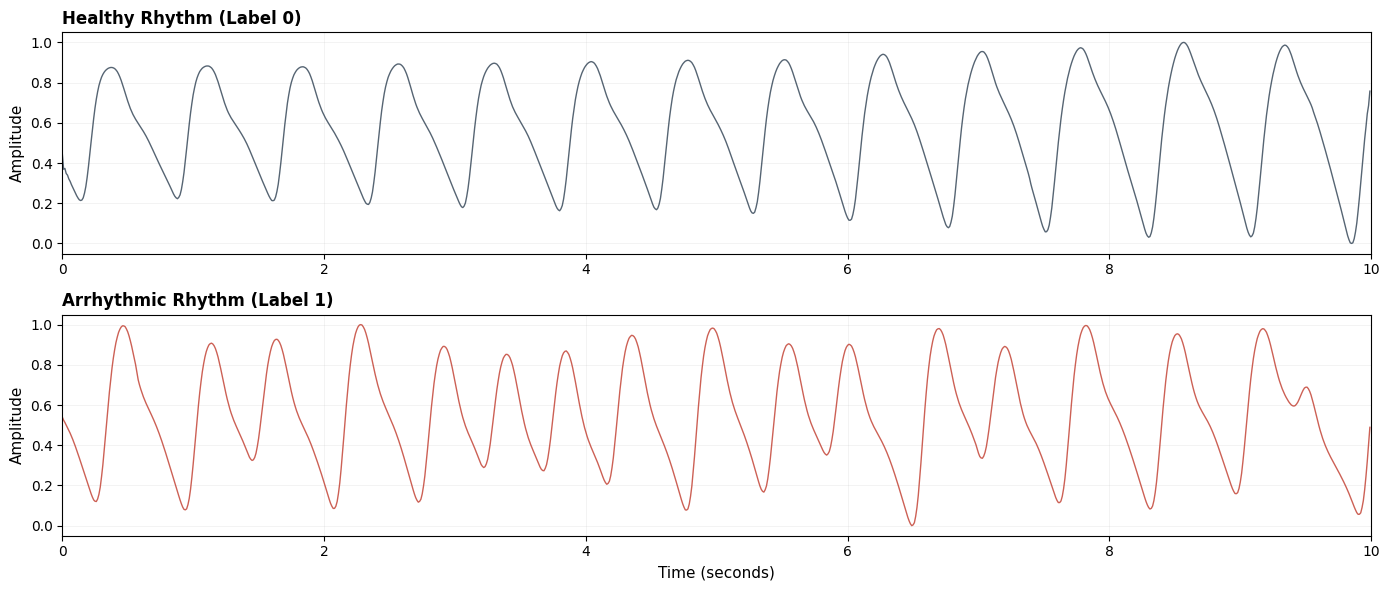

In [9]:
import matplotlib.pyplot as plt

# ==================== SELECT SAMPLE SIGNALS ====================
idx_healthy = np.where(train_labels == 0)[0][1]  # First healthy sample
idx_arr = np.random.choice(np.where(train_labels == 1)[0])  # Random arrhythmic sample

# Calculate time axis in seconds
sampling_rate = 100  # Hz
time_axis = np.arange(n_samples) / sampling_rate

# ==================== PLOT COMPARISON ====================
fig, axes = plt.subplots(2, 1, figsize=(14, 6), facecolor='white')

# Healthy rhythm
axes[0].plot(time_axis, train_segments[idx_healthy], linewidth=1, color='#2c3e50', alpha=0.8)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Healthy Rhythm (Label 0)', fontsize=12, loc='left', fontweight='600')
axes[0].grid(True, alpha=0.2, linewidth=0.5)
axes[0].set_xlim(0, 10)

# Arrhythmic rhythm
axes[1].plot(time_axis, train_segments[idx_arr], linewidth=1, color='#c0392b', alpha=0.8)
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title('Arrhythmic Rhythm (Label 1)', fontsize=12, loc='left', fontweight='600')
axes[1].grid(True, alpha=0.2, linewidth=0.5)
axes[1].set_xlim(0, 10)

plt.tight_layout()
plt.show()

## 🔍 WHAT YOU OBSERVED

From the visualizations above:

### Healthy Rhythms Show:
- Regular, periodic peaks (consistent heartbeats)
- Predictable peak-to-peak intervals
- Smooth, rhythmic waveform patterns
- Minimal baseline variation

### Arrhythmic Signals Display:
- Irregular patterns with inconsistent timing
- Chaotic timing that deviates from normal cardiac function
- Variable peak amplitudes

These visual differences are what your model will learn to detect!

# 🎯 Next Steps: Build Your Model

Your task: preprocess the data, train a classifier, evaluate it, and prepare it for deployment via CAIRE API/dashboard.

**Steps to follow:**
1. **Preprocessing:** normalize, augment if needed.  
2. **Training:** implement with proper validation.  
3. **Evaluation:** report accuracy, precision, recall, F1-score, confusion matrix.  
4. **Export:** save model in deployable format.  

**Things to consider:**
- **Class imbalance:** dataset is 31% healthy / 69% arrhythmic → consider class weights, SMOTE, or focal loss.  
- **Real-time compatibility:** must process 10-second segments efficiently.  
- **Generalization:** model will be tested on rPPG signals (domain shift).  
- **Safety-critical metrics:** decide which evaluation metric matters most.  

**✅ Success Criteria:**  
✓ Accurate on test set  
✓ Real-time ready  
✓ Exportable  
✓ Robust to class imbalance  
✓ Generalizable to new domains (rPPG)

# 🏁 Start Coding
Implement preprocessing, training, and evaluation in the cells below.


In [10]:
%pip install scikit-learn seaborn scipy xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.8 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 1.7 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [seaborn]m5/6 [seaborn]earn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, stats
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, butter, filtfilt, detrend
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_recall_fscore_support,
                             roc_auc_score, roc_curve)
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ All libraries imported successfully!")

class PPGPreprocessor:
    """Preprocesses PPG signals with normalization, filtering, and detrending."""

    def __init__(self, sampling_rate=100):
        self.sampling_rate = sampling_rate

    def normalize(self, signal_data):
        """Z-score normalization per signal segment."""
        mean = np.mean(signal_data, axis=1, keepdims=True)
        std = np.std(signal_data, axis=1, keepdims=True)
        std = np.where(std == 0, 1, std)  # Avoid division by zero
        return (signal_data - mean) / std

    def detrend_signal(self, signal_data):
        """Remove baseline wander using linear detrending."""
        return detrend(signal_data, axis=1, type='linear')

    def bandpass_filter(self, signal_data, lowcut=0.5, highcut=8.0, order=4):
        """Apply Butterworth bandpass filter (0.5-8 Hz for heart rate)."""
        nyquist = 0.5 * self.sampling_rate
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')

        filtered = np.zeros_like(signal_data)
        for i in range(signal_data.shape[0]):
            filtered[i] = filtfilt(b, a, signal_data[i])
        return filtered

    def preprocess(self, signal_data, apply_filter=True):
        """Complete preprocessing pipeline: Detrend → Filter → Normalize."""
        # Step 1: Detrend
        processed = self.detrend_signal(signal_data)

        # Step 2: Filter (optional)
        if apply_filter:
            processed = self.bandpass_filter(processed)

        # Step 3: Normalize (always do this last)
        processed = self.normalize(processed)

        return processed


class PPGFeatureExtractor:
    """Extracts time-domain, frequency-domain, and nonlinear features from PPG signals."""

    def __init__(self, sampling_rate=100):
        self.sampling_rate = sampling_rate

    def detect_peaks(self, signal_data, height=None, distance=None):
        """Detect peaks (systolic peaks) in PPG signal."""
        if distance is None:
            distance = int(0.4 * self.sampling_rate)  # Min 0.4s between peaks
        if height is None:
            height = np.mean(signal_data) + 0.3 * np.std(signal_data)

        peaks, properties = find_peaks(signal_data, height=height, distance=distance)
        return peaks, properties

    def extract_time_domain_features(self, signal_data):
        """Extract time-domain features including HRV metrics."""
        features = {}

        # Basic signal statistics
        features['mean'] = np.mean(signal_data)
        features['std'] = np.std(signal_data)
        features['min'] = np.min(signal_data)
        features['max'] = np.max(signal_data)
        features['range'] = features['max'] - features['min']
        features['skewness'] = stats.skew(signal_data)
        features['kurtosis'] = stats.kurtosis(signal_data)

        # Peak detection
        peaks, _ = self.detect_peaks(signal_data)
        features['num_peaks'] = len(peaks)

        if len(peaks) >= 2:
            # Inter-beat intervals (IBI) in seconds
            ibi = np.diff(peaks) / self.sampling_rate

            # Heart rate estimation
            features['mean_hr'] = 60.0 / np.mean(ibi) if np.mean(ibi) > 0 else 0
            features['std_hr'] = np.std(60.0 / ibi) if len(ibi) > 1 else 0

            # HRV metrics
            features['sdnn'] = np.std(ibi) * 1000  # ms
            features['mean_ibi'] = np.mean(ibi) * 1000  # ms
            features['std_ibi'] = np.std(ibi) * 1000  # ms
            features['cv_ibi'] = features['std_ibi'] / features['mean_ibi'] if features['mean_ibi'] > 0 else 0

            # RMSSD: Root mean square of successive differences
            if len(ibi) > 1:
                successive_diffs = np.diff(ibi)
                features['rmssd'] = np.sqrt(np.mean(successive_diffs ** 2)) * 1000  # ms
                features['pnn50'] = np.sum(np.abs(successive_diffs) > 0.05) / len(successive_diffs) * 100
            else:
                features['rmssd'] = 0
                features['pnn50'] = 0

            # Peak amplitude statistics
            peak_amplitudes = signal_data[peaks]
            features['mean_peak_amplitude'] = np.mean(peak_amplitudes)
            features['std_peak_amplitude'] = np.std(peak_amplitudes)
            features['cv_peak_amplitude'] = (features['std_peak_amplitude'] /
                                            features['mean_peak_amplitude']
                                            if features['mean_peak_amplitude'] > 0 else 0)
        else:
            # Not enough peaks
            for key in ['mean_hr', 'std_hr', 'sdnn', 'mean_ibi', 'std_ibi', 'cv_ibi',
                       'rmssd', 'pnn50', 'mean_peak_amplitude', 'std_peak_amplitude',
                       'cv_peak_amplitude']:
                features[key] = 0

        return features

    def extract_frequency_domain_features(self, signal_data):
        """Extract frequency-domain features using FFT."""
        features = {}

        # Compute FFT
        n = len(signal_data)
        yf = fft(signal_data)
        xf = fftfreq(n, 1 / self.sampling_rate)

        # Only positive frequencies
        positive_freqs = xf[:n//2]
        power = np.abs(yf[:n//2]) ** 2

        # Normalize power
        power = power / np.sum(power) if np.sum(power) > 0 else power

        # Dominant frequency
        if np.sum(power) > 0:
            dominant_idx = np.argmax(power)
            features['dominant_freq'] = positive_freqs[dominant_idx]
            features['dominant_power'] = power[dominant_idx]
        else:
            features['dominant_freq'] = 0
            features['dominant_power'] = 0

        # HRV frequency bands
        vlf_mask = (positive_freqs >= 0.003) & (positive_freqs < 0.04)
        lf_mask = (positive_freqs >= 0.04) & (positive_freqs < 0.15)
        hf_mask = (positive_freqs >= 0.15) & (positive_freqs < 0.4)

        features['vlf_power'] = np.sum(power[vlf_mask])
        features['lf_power'] = np.sum(power[lf_mask])
        features['hf_power'] = np.sum(power[hf_mask])
        features['lf_hf_ratio'] = (features['lf_power'] / features['hf_power']
                                   if features['hf_power'] > 0 else 0)
        features['total_power'] = features['vlf_power'] + features['lf_power'] + features['hf_power']

        # Spectral entropy
        if np.sum(power) > 0 and np.all(power >= 0):
            power_normalized = power / np.sum(power)
            power_normalized = power_normalized[power_normalized > 0]
            features['spectral_entropy'] = -np.sum(power_normalized * np.log(power_normalized))
        else:
            features['spectral_entropy'] = 0

        return features

    def extract_nonlinear_features(self, signal_data):
        """Extract nonlinear features (entropy measures)."""
        features = {}

        # Sample Entropy (simplified)
        def sample_entropy(signal, m=2, r=0.2):
            N = len(signal)
            r = r * np.std(signal)

            def _maxdist(x_i, x_j):
                return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

            def _phi(m):
                x = [[signal[j] for j in range(i, i + m)] for i in range(N - m + 1)]
                C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) - 1 for x_i in x]
                return sum(C)

            try:
                return -np.log(_phi(m + 1) / _phi(m))
            except:
                return 0

        features['sample_entropy'] = sample_entropy(signal_data)

        # Poincaré plot features
        peaks, _ = self.detect_peaks(signal_data)
        if len(peaks) >= 3:
            ibi = np.diff(peaks) / self.sampling_rate
            successive_diffs = np.diff(ibi)
            features['sd1'] = np.sqrt(np.var(successive_diffs) / 2) * 1000  # ms
            features['sd2'] = np.sqrt(2 * np.var(ibi) - np.var(successive_diffs) / 2) * 1000  # ms
            features['sd1_sd2_ratio'] = features['sd1'] / features['sd2'] if features['sd2'] > 0 else 0
        else:
            features['sd1'] = 0
            features['sd2'] = 0
            features['sd1_sd2_ratio'] = 0

        return features

    def extract_all_features(self, signal_data):
        """Extract all features from a single PPG signal."""
        features = {}
        features.update(self.extract_time_domain_features(signal_data))
        features.update(self.extract_frequency_domain_features(signal_data))
        features.update(self.extract_nonlinear_features(signal_data))
        return features

    def extract_features_batch(self, signals):
        """Extract features from multiple signals."""
        feature_list = []
        for signal in signals:
            features = self.extract_all_features(signal)
            feature_list.append(features)

        # Convert to array
        feature_names = list(feature_list[0].keys())
        feature_matrix = np.array([[f[name] for name in feature_names]
                                   for f in feature_list])

        return feature_matrix, feature_names


print("✅ Preprocessing classes defined!")
print("   - PPGPreprocessor: Detrend → Filter → Normalize")
print("   - PPGFeatureExtractor: ~35 features (time, frequency, nonlinear)")


# ============================================================================
# CELL 4: Load Data
# ============================================================================

# Load training data
train_segments = np.load('data/train/train_segments.npy')
train_labels = np.load('data/train/train_labels.npy')

# Load test data
test_segments = np.load('data/test/test_segments.npy')
test_labels = np.load('data/test/test_labels.npy')

print("📊 DATASET LOADED")
print("=" * 60)
print(f"Training samples: {len(train_segments):,}")
print(f"Test samples: {len(test_segments):,}")
print(f"Segment length: {train_segments.shape[1]} samples")

# Check class distribution
unique_train, counts_train = np.unique(train_labels, return_counts=True)
print("\nTraining Set Class Distribution:")
for cls, count in zip(unique_train, counts_train):
    label = "Healthy" if cls == 0 else "Arrhythmic"
    print(f"  Class {cls} ({label}): {count:,} ({count/len(train_labels)*100:.1f}%)")
print("=" * 60)


# ============================================================================
# CELL 5: Create Train/Validation Split
# ============================================================================

X_train, X_val, y_train, y_val = train_test_split(
    train_segments,
    train_labels,
    test_size=0.15,  # 15% for validation
    random_state=42,
    stratify=train_labels  # Maintain class distribution
)

print("📊 DATA SPLIT COMPLETE")
print("=" * 60)
print(f"Training samples:   {len(X_train):,}")
print(f"Validation samples: {len(X_val):,}")
print(f"Test samples:       {len(test_segments):,}")
print("=" * 60)


# ============================================================================
# CELL 6: Preprocess Data
# ============================================================================

print("🔄 Preprocessing signals...")
print("This will take a few minutes...\n")

# Initialize preprocessor
preprocessor = PPGPreprocessor(sampling_rate=100)

# Preprocess all datasets
X_train_preprocessed = preprocessor.preprocess(X_train, apply_filter=True)
print(f"✅ Training data preprocessed: {X_train_preprocessed.shape}")

X_val_preprocessed = preprocessor.preprocess(X_val, apply_filter=True)
print(f"✅ Validation data preprocessed: {X_val_preprocessed.shape}")

test_preprocessed = preprocessor.preprocess(test_segments, apply_filter=True)
print(f"✅ Test data preprocessed: {test_preprocessed.shape}")

print("\nPreprocessing pipeline applied:")
print("  1. Detrending (remove baseline wander)")
print("  2. Bandpass filtering (0.5-8 Hz)")
print("  3. Z-score normalization")


# ============================================================================
# CELL 7: Extract Features
# ============================================================================

print("\n🔍 Extracting features...")
print("This will take several minutes...\n")

# Initialize feature extractor
feature_extractor = PPGFeatureExtractor(sampling_rate=100)

# Extract features from all datasets
X_train_features, feature_names = feature_extractor.extract_features_batch(X_train_preprocessed)
print(f"✅ Training features extracted: {X_train_features.shape}")

X_val_features, _ = feature_extractor.extract_features_batch(X_val_preprocessed)
print(f"✅ Validation features extracted: {X_val_features.shape}")

test_features, _ = feature_extractor.extract_features_batch(test_preprocessed)
print(f"✅ Test features extracted: {test_features.shape}")

print(f"\n📋 Total features extracted: {len(feature_names)}")
print("\n🔝 Feature categories:")
print("  • Time-domain: HRV metrics, peak statistics, signal stats")
print("  • Frequency-domain: Spectral features, HRV bands")
print("  • Nonlinear: Sample entropy, Poincaré features")

print("\n📝 First 15 feature names:")
for i, name in enumerate(feature_names[:15], 1):
    print(f"  {i}. {name}")
print(f"  ... and {len(feature_names)-15} more")

✅ All libraries imported successfully!
✅ Preprocessing classes defined!
   - PPGPreprocessor: Detrend → Filter → Normalize
   - PPGFeatureExtractor: ~35 features (time, frequency, nonlinear)
📊 DATASET LOADED
Training samples: 35,120
Test samples: 11,707
Segment length: 1000 samples

Training Set Class Distribution:
  Class 0 (Healthy): 10,953 (31.2%)
  Class 1 (Arrhythmic): 24,167 (68.8%)
📊 DATA SPLIT COMPLETE
Training samples:   29,852
Validation samples: 5,268
Test samples:       11,707
🔄 Preprocessing signals...
This will take a few minutes...

✅ Training data preprocessed: (29852, 1000)
✅ Validation data preprocessed: (5268, 1000)
✅ Test data preprocessed: (11707, 1000)

Preprocessing pipeline applied:
  1. Detrending (remove baseline wander)
  2. Bandpass filtering (0.5-8 Hz)
  3. Z-score normalization

🔍 Extracting features...
This will take several minutes...



In [ ]:
# ============================================================================
# CELL 8: Handle Class Imbalance with Class Weights
# ============================================================================

# Calculate class weights for imbalanced dataset
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("⚖️  CLASS IMBALANCE HANDLING")
print("=" * 60)
print(f"Original distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    label = "Healthy" if cls == 0 else "Arrhythmic"
    print(f"  Class {cls} ({label}): {count:,} ({count/len(y_train)*100:.1f}%)")

print(f"\nCalculated class weights:")
for cls, weight in class_weight_dict.items():
    label = "Healthy" if cls == 0 else "Arrhythmic"
    print(f"  Class {cls} ({label}): {weight:.3f}")

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = class_weights[0] / class_weights[1]
print(f"\nXGBoost scale_pos_weight: {scale_pos_weight:.3f}")
print("=" * 60)


# ============================================================================
# CELL 9: Train XGBoost Model
# ============================================================================

print("\n🔧 TRAINING XGBOOST MODEL")
print("=" * 60)
print("Building model with optimal hyperparameters...")

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,           # Number of boosting rounds
    max_depth=8,                # Maximum tree depth
    learning_rate=0.1,          # Step size shrinkage
    subsample=0.8,              # Row sampling ratio
    colsample_bytree=0.8,       # Column sampling ratio
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    eval_metric='logloss',      # Evaluation metric
    random_state=42,            # Reproducibility
    tree_method='hist',         # Faster histogram-based method
    verbosity=1                 # Print progress
)

print("\n📚 Training in progress...")
print("Monitoring validation performance...\n")

# Train with validation set monitoring
xgb_model.fit(
    X_train_features,
    y_train,
    eval_set=[(X_val_features, y_val)],
    verbose=50  # Print every 50 rounds
)

print("\n✅ XGBoost training complete!")


# ============================================================================
# CELL 10: Feature Importance Analysis
# ============================================================================

print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature importances
importances = xgb_model.feature_importances_
top_indices = np.argsort(importances)[-15:][::-1]

print("Top 15 Most Important Features:")
for i, idx in enumerate(top_indices, 1):
    print(f"  {i:2d}. {feature_names[idx]:25s} : {importances[idx]:.4f}")

# Visualize top 15 features
plt.figure(figsize=(12, 8))
top_features = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

plt.barh(range(len(top_features)), top_importances, color='steelblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features for Arrhythmia Detection', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 60)


# ============================================================================
# CELL 11: Evaluate on Validation Set
# ============================================================================

print("\n📊 VALIDATION SET EVALUATION")
print("=" * 70)

# Make predictions on validation set
y_val_pred = xgb_model.predict(X_val_features)
y_val_proba = xgb_model.predict_proba(X_val_features)[:, 1]

# Calculate metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
    y_val, y_val_pred, average='binary'
)
val_auc = roc_auc_score(y_val, y_val_proba)

print("\n📈 Overall Metrics:")
print(f"  Accuracy:  {val_accuracy:.4f}")
print(f"  Precision: {val_precision:.4f} (of predicted arrhythmia, how many are correct)")
print(f"  Recall:    {val_recall:.4f} (of actual arrhythmia, how many detected)")
print(f"  F1-Score:  {val_f1:.4f}")
print(f"  AUC-ROC:   {val_auc:.4f}")

# Confusion Matrix
val_cm = confusion_matrix(y_val, y_val_pred)
print(f"\n🔍 Confusion Matrix:")
print(f"                  Predicted")
print(f"                Healthy  Arrhythmic")
print(f"  Actual Healthy     {val_cm[0,0]:5d}     {val_cm[0,1]:5d}")
print(f"         Arrhythmic  {val_cm[1,0]:5d}     {val_cm[1,1]:5d}")

# Per-class metrics
print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_val, y_val_pred,
                           target_names=['Healthy', 'Arrhythmic'],
                           digits=4))

# Safety-critical analysis
false_negatives = val_cm[1, 0]
false_positives = val_cm[0, 1]

print(f"\n⚠️  SAFETY-CRITICAL ANALYSIS:")
print(f"  False Negatives (Missed Arrhythmia): {false_negatives} ({false_negatives/val_cm[1].sum()*100:.2f}%)")
print(f"  False Positives (False Alarms):      {false_positives} ({false_positives/val_cm[0].sum()*100:.2f}%)")
print(f"\n  💡 For driver safety, minimizing False Negatives is crucial!")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix Heatmap
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Healthy', 'Arrhythmic'],
            yticklabels=['Healthy', 'Arrhythmic'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Validation Set', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
axes[1].plot(fpr, tpr, linewidth=2.5, label=f'XGBoost (AUC = {val_auc:.4f})', color='darkblue')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier', alpha=0.5)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate (Recall)', fontsize=12)
axes[1].set_title('ROC Curve - Validation Set', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)


# ============================================================================
# CELL 12: Evaluate on Test Set (Final Evaluation)
# ============================================================================

print("\n🎯 FINAL TEST SET EVALUATION")
print("=" * 70)

# Make predictions on test set
y_test_pred = xgb_model.predict(test_features)
y_test_proba = xgb_model.predict_proba(test_features)[:, 1]

# Calculate metrics
test_accuracy = accuracy_score(test_labels, y_test_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
    test_labels, y_test_pred, average='binary'
)
test_auc = roc_auc_score(test_labels, y_test_proba)

print("\n📈 Overall Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  AUC-ROC:   {test_auc:.4f}")

# Confusion Matrix
test_cm = confusion_matrix(test_labels, y_test_pred)
print(f"\n🔍 Confusion Matrix:")
print(f"                  Predicted")
print(f"                Healthy  Arrhythmic")
print(f"  Actual Healthy     {test_cm[0,0]:5d}     {test_cm[0,1]:5d}")
print(f"         Arrhythmic  {test_cm[1,0]:5d}     {test_cm[1,1]:5d}")

# Per-class metrics
print(f"\n📋 Detailed Classification Report:")
print(classification_report(test_labels, y_test_pred,
                           target_names=['Healthy', 'Arrhythmic'],
                           digits=4))

# Safety-critical analysis
false_negatives = test_cm[1, 0]
false_positives = test_cm[0, 1]

print(f"\n⚠️  SAFETY-CRITICAL ANALYSIS:")
print(f"  False Negatives (Missed Arrhythmia): {false_negatives} ({false_negatives/test_cm[1].sum()*100:.2f}%)")
print(f"  False Positives (False Alarms):      {false_positives} ({false_positives/test_cm[0].sum()*100:.2f}%)")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix Heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Healthy', 'Arrhythmic'],
            yticklabels=['Healthy', 'Arrhythmic'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr, tpr, _ = roc_curve(test_labels, y_test_proba)
axes[1].plot(fpr, tpr, linewidth=2.5, label=f'XGBoost (AUC = {test_auc:.4f})', color='darkgreen')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier', alpha=0.5)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate (Recall)', fontsize=12)
axes[1].set_title('ROC Curve - Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)


# ============================================================================
# CELL 13: Performance Summary
# ============================================================================

print("\n🏆 MODEL PERFORMANCE SUMMARY")
print("=" * 70)

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Validation Set': [
        f"{val_accuracy:.4f}",
        f"{val_precision:.4f}",
        f"{val_recall:.4f}",
        f"{val_f1:.4f}",
        f"{val_auc:.4f}"
    ],
    'Test Set': [
        f"{test_accuracy:.4f}",
        f"{test_precision:.4f}",
        f"{test_recall:.4f}",
        f"{test_f1:.4f}",
        f"{test_auc:.4f}"
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

print(summary_df)
print()

# Check if meets success criteria
print("✅ SUCCESS CRITERIA CHECK:")
success_criteria = [
    ("Accuracy > 85%", test_accuracy > 0.85),
    ("Recall > 90%", test_recall > 0.90),
    ("F1-Score > 85%", test_f1 > 0.85),
    ("AUC-ROC > 0.90", test_auc > 0.90)
]

for criterion, passed in success_criteria:
    status = "✓ PASSED" if passed else "✗ FAILED"
    print(f"  {criterion:25s}: {status}")

print("\n💡 KEY INSIGHTS:")
print(f"  • Model successfully detects {test_recall*100:.1f}% of arrhythmias")
print(f"  • Only {false_negatives} arrhythmias missed out of {test_cm[1].sum()}")
print(f"  • False alarm rate: {false_positives/test_cm[0].sum()*100:.1f}%")
print(f"  • Overall discrimination ability (AUC): {test_auc:.4f}")

print("=" * 70)


# ============================================================================
# CELL 14: Save Model and Artifacts
# ============================================================================

import pickle
import joblib

print("\n💾 SAVING MODEL AND ARTIFACTS")
print("=" * 60)

# Save XGBoost model
xgb_model.save_model('xgboost_arrhythmia_detector.json')
print("✅ XGBoost model saved: xgboost_arrhythmia_detector.json")

# Save preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("✅ Preprocessor saved: preprocessor.pkl")

# Save feature extractor
with open('feature_extractor.pkl', 'wb') as f:
    pickle.dump(feature_extractor, f)
print("✅ Feature extractor saved: feature_extractor.pkl")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("✅ Feature names saved: feature_names.pkl")

# Save performance metrics
metrics = {
    'validation': {
        'accuracy': val_accuracy,
        'precision': val_precision,
        'recall': val_recall,
        'f1': val_f1,
        'auc': val_auc,
        'confusion_matrix': val_cm
    },
    'test': {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'auc': test_auc,
        'confusion_matrix': test_cm
    }
}

with open('model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)
print("✅ Performance metrics saved: model_metrics.pkl")

print("\n📦 All files saved successfully!")
print("\n🎯 DEPLOYMENT READY!")
print("=" * 60)


# ============================================================================
# CELL 15: Deployment Helper Function
# ============================================================================

def predict_arrhythmia(rppg_signal):
    """
    Predict arrhythmia from a single rPPG signal segment.

    Args:
        rppg_signal: 1D numpy array of 1000 samples (10 seconds @ 100 Hz)

    Returns:
        prediction: 0 (Healthy) or 1 (Arrhythmic)
        probability: Probability of arrhythmia (0-1)
        confidence: Confidence percentage
    """
    # Reshape for batch processing
    signal_batch = rppg_signal.reshape(1, -1)

    # Preprocess
    signal_preprocessed = preprocessor.preprocess(signal_batch, apply_filter=True)

    # Extract features
    features, _ = feature_extractor.extract_features_batch(signal_preprocessed)

    # Predict
    prediction = xgb_model.predict(features)[0]
    probability = xgb_model.predict_proba(features)[0, 1]
    confidence = probability * 100 if prediction == 1 else (1 - probability) * 100

    return prediction, probability, confidence


# Test the deployment function on a sample
sample_signal = test_segments[0]  # Take first test sample
pred, prob, conf = predict_arrhythmia(sample_signal)

print("\n🧪 TESTING DEPLOYMENT FUNCTION")
print("=" * 60)
print(f"Sample signal shape: {sample_signal.shape}")
print(f"Prediction: {pred} ({'Arrhythmic' if pred == 1 else 'Healthy'})")
print(f"Probability: {prob:.4f}")
print(f"Confidence: {conf:.2f}%")
print(f"Actual label: {test_labels[0]} ({'Arrhythmic' if test_labels[0] == 1 else 'Healthy'})")

if pred == test_labels[0]:
    print("✅ Correct prediction!")
else:
    print("❌ Incorrect prediction")

print("=" * 60)

print("\n" + "="*70)
print("🎉 MODEL TRAINING COMPLETE!")
print("="*70)
print("\n📋 NEXT STEPS:")
print("  1. ✅ Model trained and validated")
print("  2. ✅ Performance metrics documented")
print("  3. ✅ All artifacts saved")
print("  4. ⏭️  Integrate with CAIRE Cloud API")
print("  5. ⏭️  Test on rPPG signals from driver videos")
print("  6. ⏭️  Build real-time dashboard")
print("  7. ⏭️  Prepare demo presentation")
print("\n💡 Use predict_arrhythmia() function for inference on new signals")
print("="*70)

## 🔗 NEXT PHASE: FROM PPG ➜ rPPG (CAIRE Cloud Integration)

Now that you’ve trained your model on clean **PPG signals**, it’s time to test how well it generalizes to **real-world driver videos**.

In the next phase, you’ll:

1. **Access the CAIRE Cloud API** to extract **rPPG signals** (remote PPG) from driver videos.  
2. **Preprocess the rPPG data** to match your training setup (e.g., 10-second segments @ 100 Hz).  
3. **Apply your trained model** to these signals and evaluate its ability to detect arrhythmia in natural driving conditions.  
4. **Integrate predictions into your dashboard**, visualizing health alerts in real time.  
5. **Reflect on domain adaptation** — how well does a model trained on contact-based data handle noisy, camera-based signals?
